# 位相キックバック

このページでは、制御量子ゲートの振る舞いとして知られている「位相キックバック」を取り上げます。この興味深い量子効果は、Shorの因数分解アルゴリズムやGroverの探索アルゴリズムなど、多くの有名な量子アルゴリズムの構成要素となっています。

## 固有ベクトル

固有ベクトルと固有値についてはすでによくご存知のはずですが、そうでない場合は[ここに](https://www.khanacademy.org/math/linear-algebra/alternate-bases/eigen-everything/v/linear-algebra-introduction-to-eigenvalues-and-eigenvectors)書かれた入門書を読むとよいでしょう。もしあなたが精通して*いる*なら、固有ベクトル方程式を理解することができるはずです。

$$ \class{_matrix-A}{A}\class{_eig-vec-A}{|x\rangle} = \class{_eig-val-A}{\lambda}\class{_eig-vec-A}{|x\rangle} $$

量子コンピューターではもっと簡単です。すべての状態ベクトルの大きさが1なので、固有値も1である必要があります。つまり、 $\lambda = e^{2\pi i \theta}$ となります。故に、量子ゲート $U$ とその固有状態 $|x\rangle$ について、以下のようになります。

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\class{_eig-vec-U}{|x\rangle} $$

要約: あるゲートが状態ベクトルの全ての振幅を同じだけ回転させる（そして回転させるのみの）場合、その量子状態はそのゲートの*固有状態*です。

<!-- ::: q-block -->

### 固有ベクトルを見つけてみよう

下のウィジェットを使って、単一量子ビットのゲートが単一量子ビットの状態をどのように変換するかを見てみましょう。どの状態がどのゲートの固有状態であるかわかりますか？

    q-eigenvector-widget

<!-- ::: -->

## 制御ゲートと固有状態

固有状態の概念に慣れたら、これらの回路を別の量子ビットの状態で制御するとどうなるかを考え始めることができます。例えば、Zゲートが作用している状態 $|1\rangle$ は負のグローバル位相 ($\theta = 0.5$) を与えることが分かっていますが、この操作を制御するとどうなるかを考えてみましょう。

<!-- ::: q-block.tabs -->

### 制御Zゲート

<!-- ::: tab -->

### |10〉

<!-- ::: column(width=200) -->

もし制御量子ビットが $|0\rangle$ であれば、動きは単純で何も起こりません。

<!-- ::: column(width=400) -->

![状態01の2量子ビットレジスタをCZゲートで動作させた場合の回路図。状態は変化しません。](images/kickback/tabs/0/0.svg)

<!-- ::: -->

<!-- ::: tab -->

### |11〉

<!-- ::: column(width=200) -->

制御量子ビットが $|1\rangle$ の場合、ゲートはグローバルな位相を与えますが（右図のマイナス記号に注意）、量子ビットの状態は変化しません。

<!-- ::: column(width=400) -->

![状態11の2量子ビットレジスタをCZゲートで動作させた場合の回路図。グローバル位相を与えますが、状態は変化しません。](images/kickback/tabs/0/1.svg)

<!-- ::: -->

<!-- ::: tab -->

### |1+〉

<!-- ::: column(width=200) -->

制御Zゲートは制御量子ビットが $|0\rangle$ の時何もせず、 $|1\rangle$ の時に負の位相を与えます。制御量子ビットが重ね合わせ状態にあるとき、そのゲートは制御量子ビットの $|0\rangle$ と $|1\rangle$ の*相対*位相を変化させます。

<!-- ::: column(width=400) -->

![状態+1の2量子ビットレジスタをCZゲートで動作させた場合の回路図。相対位相を変化させます。](images/kickback/tabs/0/2.svg)

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

制御量子ビットが $|{+}\rangle$ で標的量子ビットが $|1\rangle$ の時、制御Zゲートは*制御*量子ビットの状態は変化させますが、標的量子ビットは変化させません。この効果は「位相キックバック」と呼ばれ、固有値が制御量子ビットの状態に戻ってくるからです。

より一般的には、量子ゲート $U$ があり、その固有状態が $|x\rangle$ であれば、 $U$ が $|x\rangle$ に作用すると、上で見たようにグローバル位相 $\theta$ が与えられる。

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\class{_eig-vec-U}{|x\rangle} $$

$U|x\rangle$ の操作を $|0\rangle$ と $|1\rangle$ の重ね合わせの別の量子ビットで制御すると、制御量子ビットをZ軸周りに角度 $\theta$ だけ回転させる効果がある。すなわち

$$ \class{_matrix-CU}{CU}\class{_eig-vec-U}{|x\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\rangle)} = \class{_eig-vec-U}{|x\rangle}\class{_control-qubit-post}{(\alpha|0\rangle + \beta e^{2\pi i \theta}|1\rangle)} $$

上の例では、制御Zゲートの「制御量子ビット」が実際にZ回転していることがわかります。つまり、その量子ビットを見るだけであったはずが、実際には変化してしまっているのです。このため、制御Zゲートは2つの制御として描かれることがよくあります。

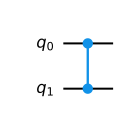

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.cz(0,1)
qc.draw()

## CNOTゲート

位相キックバックの効果を別の2量子ビットゲートで見てみましょう。$|{-}\rangle$ 状態はXゲートの固有値 $-1$ であるため、次のようになります。

$$ \class{_matrix-CX}{CX}\class{_eig-vec-X}{|{-}\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\rangle)} = \class{_eig-vec-X}{|{-}\rangle}\class{_control-qubit-post}{(\alpha|0\rangle - \beta |1\rangle)} $$

![](images/kickback/cnot-kickback.svg)

この場合も位相変化 $\theta = 0.5$ なので、制御量子ビットはZ軸の周りで反転します。

<!-- ::: q-block -->

### 例

<details>
    <summary>CNOTゲートによるキックバック (クリックで拡大)</summary> 
    
    q-carousel
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-0.svg"><br>定義によれば、制御Xゲート（CNOT）は、制御量子ビットが $|1\rangle$ であれば、ターゲット量子ビット（この例では、右端のビットがターゲット）の状態を反転させる。上の図では、CNOTゲートがある状態ベクトルを別の状態に変換している様子を示しています。
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-1.svg"><br>例えば、制御量子ビットが状態 $|0\rangle$ であれば、常に全く同じ状態ベクトルが戻ってきます。上の画像では、制御が $|1\rangle$ である状態の振幅は両方とも0なので、それらを入れ替えても何の効果も見られません。
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-2.svg"><br>もう一つの例。もし制御量子ビットが $|1\rangle$ の状態であれば、ターゲット量子ビットに対してXゲートを行います。この場合、ターゲット量子ビットはXゲートの固有状態にあるので、グローバル位相まで同じ状態ベクトルを取り戻します。この変化は、ターゲット量子ビットの $|0\rangle$ と $|1\rangle$ の振幅間の相対位相が同じままだったので、グローバル位相です。
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-3.svg"><br>制御が $|{+}\rangle$ の状態（すなわち $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ ）、目標が $|{-}\rangle$ の状態（すなわち $\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ ）のときの状態ベクトルを見てみましょう。これらの2つの量子ビットは分離可能であり、一方を測定しても他方の状態には影響しないことがわかります。
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-4.svg"><br> 例えば、制御量子ビットを $|0\rangle$ と測ろうが $|1\rangle$ と測ろうが、対象を $|0\rangle$ と測った場合と $|1\rangle$ と測った場合の振幅は同じになります。
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-5.svg"><br>これらを踏まえて、この $|{+}{-}\rangle$ の状態にCNOTを適用するとどうなるかを見てみましょう。
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-6.svg"><br>CNOTの後、これらの量子ビットはまだ分離可能であり、一方の状態は他方を測定しても変化していません。しかし、制御量子ビットの $|0\rangle$ と $|1\rangle$ の振幅の間の相対的な位相は変化しているのです!

</details>

<!-- ::: -->

H-gateは変換 $|0\rangle \rightarrow |{+}\rangle$ と $|1\rangle \rightarrow |{-}\rangle$ をする（逆も同様）と覚えると、次のような恒等式が得られます：

![](images/kickback/cnot-identity.svg)

## ドイチの問題

先ほど、ある量子ビットの状態に条件付けをすると、制御している量子ビットの状態を実際に変化させることができることを見てきました。これは「量子」効果であり、古典ビットでは起こらない現象です。

量子コンピューターでは、古典的なコンピューターが実行*できない*ようなアルゴリズムを作りたいので、この効果を解決すべき問題として捉え直すことが良い出発点となります。そうすることで、少なくとも量子コンピューターが古典的なコンピューターよりもわずかに優れていることを証明することができるのです。

ドイチの問題は、まさにこれを実現したものです。ドイチの問題は「ブラックボックス」問題です。人工的な問題で、ある関数をビットに適用することは許されていますが、その関数がどのように機能するかを見ることは許されていません。この問題では、異なる入力と出力を試すことによって、ブラックボックスの特性を発見します。

ドイチの問題は次のようなものです。$ a $ と $ b $ の２つのビットに作用する古典的な可逆関数(以下では $f$ と略記)が与えられます。この関数はビット $ a $ をそのままにしておきますが、ビット $ b $ はそのまま、もしくは反転させる場合があります。 ドイチの問題は $f$ が $ a $ の値によって異なる振る舞いをするのか(これを「分布型」の振る舞いと呼ぶ)、もしくは $ a $ に関係なく $ b $ に対して同じ作用をするのか(「定値型」の振る舞い)を判別する問題です。この問題は $f$ の適応回数をできるだけ少なくしながら判別を行うことです。

![量子回路としてのdeutschの問題のイメージ。回路には2つのビットがあり、それぞれ「a」と「b」のラベルが付いた上部と下部のワイヤがあります。次に、両方のビットは、「f」というラベルの付いた不透明な2ビットゲートによって処理されます。 「f」の後、上のワイヤには「f」というラベルが付けられていますが、下のワイヤには「f(a,b)」というラベルが付けられています。](images/kickback/deutsch-problem.svg)

この問題に対する最も優れた古典的アルゴリズムは、 $ a $ の値を変えて $f$ を2回適用し、 $f$ の振る舞いが異なるかどうかを調べるものである。

## ドイチのアルゴリズム

お気づきかもしれませんが、古典アルゴリズムよりもさらに優れた量子アルゴリズムを作るために、位相キックバックを利用することができます。量子ビット $ a $ を $|{+}\rangle$ 状態に、そして量子ビット $ b $ を $|{-}\rangle$ 状態とすると、 $ a $ を条件とした反転は負の相対位相をキックバックし、量子ビット $ a $ を $|{+}\rangle$ から $|{-}\rangle$ に反転させます。そして $ a $ にHゲートを作用させることで、位相キックバックが起こったかどうかを確認することができます。

![Image of deutsch's algorithm as a quantum circuit.](images/kickback/deutsch-algorithm.svg)

<!-- ::: q-block.reminder -->

### より詳しい情報

<details> 
    <summary>ブラックボックス内（クリックして展開）</summary>
それでも魔法のように思える場合は、考えられるすべてのドイチ関数とそれらを実装する量子回路について考えると役立ちます。可能なドイチ関数は4つあります。2つは定数、2つは平衡です。

定値型ならその関数は何もしないか、量子ビット $ b $ を反転させます。分布型なら  $ a $ が $|1\rangle$ の時のみ $ b $ を反転させるか、 $ a $ が $|0\rangle$ の時のみ $ b $ を反転させます。 下の画像で4つのシナリオを見ることができます。

<img src="images/kickback/deutsch-oracles.svg">

定値型関数では、両方とも一番上の量子ビットは変化せず（一番上の量子ビットに対して何もしていないため）、分布型関数では、キックバックの効果で一番上の量子ビットが $|{+}\rangle$ から $|{-}\rangle$ に反転します。
</details>

<!-- ::: -->

この問題は非常に特殊な設定であり、ブラックボックス問題は通常は見かけないため、量子力学のスピードアップの例としてはあまり印象的ではありません。その代わり、ドイチの問題では我々にとって励みになる結果を得ることができ、また、いくつかの興味深い効果を調べることができます。このコースの残りの部分では、この単純な実験を拡張して、因数分解を含むより印象的な問題を解いていきます。

<!-- ::: q-block.exercise -->

### 練習問題

ドイチ関数を `QuantumCircuit` で受け取る `deutsch()` という関数を作り、量子シミュレーター上でドイチのアルゴリズムを使って問題を解きましょう。作成する関数は、ドイチ関数が分布型であれば `True` を、定値型であれば `False` を返さなければなりません。

`deutsch_problem()` 関数を使って `QuantumCircuit` を作成し、 `deutsch()` 関数の入力として使うことができます。

<!-- ::: -->

In [ ]:
from qiskit import QuantumCircuit
import numpy as np

def deutsch_problem(seed=None):
    """ドイチの問題から関数を実行する回路を返します。
    Args:
        seed (int): 同じseedに対して常に同じ回路が返されます。
    Returns: QuantumCircuit
    """
    np.random.seed(seed)
    problem = QuantumCircuit(2)
    if np.random.randint(2):
        print("Function is balanced.")
        problem.cx(0, 1)
    else:
        print("Function is constant.")
    if np.random.randint(2):
        problem.x(1)
    return problem

In [ ]:
def deutsch(function):
    """ドイチのアルゴリズムを実装してみよう。

    Args:
        function (QuantumCircuit): ドイチの関数
            分布型か定値型の2量子ビット回路でなければならない。
    Returns:
        bool: 回路が分布型の場合はTrue、そうでない場合はFalse
    """

    # コードはここへ記入

## まとめ

このページでは、以下を学びました。

- 固有値と固有ベクトルの概念を再考しました。
- 位相キックバックの効果を調べ、いくつかの例を取り上げました。
- 量子コンピューターが古典コンピューターよりも優位であるシナリオとしてドイチの問題を紹介しました。

このページから他のすべての内容を忘れたとしても、覚えておくべき最も重要なことは、以下の位相キックバックの要約です。

<!-- ::: q-block.reminder -->

### リマインダー：位相キックバック

量子ゲート $U$ があり、その固有状態が $|x\rangle$ であれば、 $U$ が $|x\rangle$ に作用すると、グローバル位相 $\theta$ が与えられる。

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\class{_eig-vec-U}{|x\rangle} $$

$U|x\rangle$ の操作を $|0\rangle$ と $|1\rangle$ の重ね合わせの別の量子ビットで制御すると、制御量子ビットをZ軸周りに角度 $\theta$ だけ回転させる効果がある。すなわち

$$ \class{_matrix-CU}{CU}\class{_eig-vec-U}{|x\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\rangle)} = \class{_eig-vec-U}{|x\rangle}\class{_control-qubit-post}{(\alpha|0\rangle + \beta e^{2\pi i \theta}|1\rangle)} $$

<!-- ::: -->